<a href="https://colab.research.google.com/github/jear2412/MetodosLineales/blob/master/ClasificadorBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
# Clasificador Bayesiano de 3 poblaciones exponenciales


import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="darkgrid")

In [333]:
#Clasificador Bayesiano para tres poblaciones exponenciales
 
def CB(x,l,n):
  #x observacion
  #l vector de lambdas de Exp

  a= np.log( l[1]/l[0] )/ (l[1]-l[0])
  b= np.log( l[2]/l[0] )/ (l[2]-l[0])
  c= np.log( l[2]/l[1] )/ (l[2]-l[1])

  p1= np.max([a,b])  
  p3= np.min([b,c])

  xbar=np.mean(x)

  if xbar>= p1:
    return 0
  elif xbar<= p1 and xbar>= p3:
    return 1
  else:
    return 2  

  


In [309]:
l=np.array([1,2,3]) #vector de lambdas



In [315]:
#-------- Simulacion del error del clasificador


def simerror( simobs, nsims , l , n  ):

  ''' simobs: observaciones en la simulacion
      nsims: numero de simulaciones
      l: vector de lambdas
      n: cuantas observaciones tenemos para calcular el error''' 

  ematrix=np.zeros( (simobs, nsims) ) #matriz donde se guardara el error simulado a medida crece la muestra

  for k in range( nsims ):
    I=np.zeros(simobs) # cual estamos muestreando?
    label=np.zeros(simobs) #etiquetas asignadas por el clasificador
    error=np.zeros(simobs) #error del clasificador
    for m in range(simobs):
      I[m]=np.random.choice(np.array([0,1,2])   , size=1)[0] #seleccionamos que poblacion muestrear
      sample= scipy.stats.expon.rvs( scale=1/l[int(I[m])] , size= n) #cuantas observaciones
      label[m]= CB( sample,l, n ) #etiqueta asignada por el clasificador
      error[m]=1-  np.sum( label[0:m+1]== I[0:m+1] )/(m+1) #
      ematrix[m,k]= error[m]
    
  return ematrix


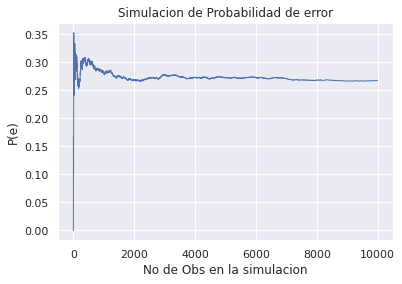

In [334]:
#grafico de las corridas del error

simobs=10000
nsims=1
n=10
ematrix=simerror( simobs, nsims, l , n  )

for i in range(nsims):
  plt.plot(ematrix[:, i], linewidth=1)
plt.xlabel('No de Obs en la simulacion')
plt.ylabel('P(e)')
plt.title('Simulacion de Probabilidad de error')
plt.savefig('sim.png', dpi=500)
plt.show()


In [329]:
# Probabilidad del error

# a prioris iguales

def perror(l,n):
  #l vector de lambdas de Exp

  a= np.log( l[1]/l[0] )/ (l[1]-l[0])
  b= np.log( l[2]/l[0] )/ (l[2]-l[0])
  c= np.log( l[2]/l[1] )/ (l[2]-l[1])

  p1= np.max([n*a,n*b])  
  p3= np.min([n*b,n*c])
  
  t1= 1-scipy.stats.gamma.cdf( p1, loc=0,a=n, scale= 1/l[0]  ) 
  t2= scipy.stats.gamma.cdf( p1, loc=0, a=n, scale= 1/l[1]  ) - scipy.stats.gamma.cdf( p3, a=n, scale= 1/l[1]  ) 
  t3= scipy.stats.gamma.cdf( p3, loc=0, a=n, scale= 1/l[2]  )
  
  return 1-1/3*(t1+t2+t3)
  
  